In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import sys
print(sys.version)
print('-------------------')
import platform
print(platform.python_version())

3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:52:09) 
[Clang 14.0.6 ]
-------------------
3.8.15


In [3]:
#"Parkinson_Multiple_Sound_Recording/train_data.txt"

data=pd.read_csv('Parkinson_Multiple_Sound_Recording/train_data.txt')

print(data.shape, '\n')
data.head()


(1040, 29) 



,Subject id,Jitter (local),Jitter (local absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),Shimmer (local dB),Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS,class
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subject id                           1040 non-null   int64  
 1   Jitter (local)                       1040 non-null   float64
 2   Jitter (local absolute)              1040 non-null   float64
 3   Jitter (rap)                         1040 non-null   float64
 4   Jitter (ppq5)                        1040 non-null   float64
 5   Jitter (ddp)                         1040 non-null   float64
 6   Shimmer (local)                      1040 non-null   float64
 7   Shimmer (local dB)                   1040 non-null   float64
 8   Shimmer (apq3)                       1040 non-null   float64
 9   Shimmer (apq5)                       1040 non-null   float64
 10   Shimmer (apq11)                     1040 non-null   float64
 11  Shimmer (dda)                 

1    520
0    520
Name: class, dtype: int64

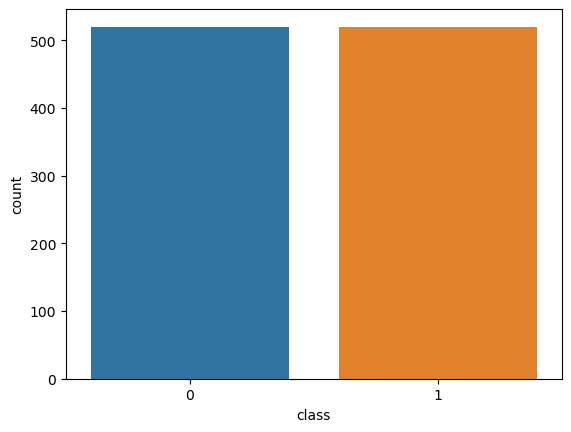

In [5]:
sns.countplot(x="class", data=data)
data['class'].value_counts()
#0 is healthy 1 is parkison affected

In [6]:
# sns.countplot(x="UPDRS", data=data)

In [7]:
# udata=data.drop('Subject id',axis=1)
# udata.head()

In [8]:
# from sklearn.decomposition import PCA

# print (data.shape)
# # udata.shape

# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# print (X.shape)

# pca = PCA(n_components=7)
# pca.fit(data)

# # We can now transform the data using the PCA object
# rdata = pca.transform(data)

# # The transformed data has been reduced to the specified number of dimensions
# print(rdata.shape)  # Output: (6, 2)

# print(pca.explained_variance_ratio_)

In [9]:
# data.info()

In [10]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Spliting the data into features and patient status and subID
updrs = data.drop('UPDRS', axis=1) 
w = data['Subject id'] # PD patient ID
X = data.drop(['Subject id', 'class','UPDRS'], axis=1)  # Features
y = data['class']  # PD or No

svc = SVC(kernel='linear')
rfe = RFE(estimator=svc, n_features_to_select=10)

# Fit the RFE object to the data
rfe.fit(X, y)

# Print the selected features
print(rfe.support_)

# Print the ranking of the features
print(rfe.ranking_)

# Selected features
rdata = X.loc[:, rfe.support_]


# print(rdata)

[ True False False False False False  True False False  True  True  True
  True False False False False False False  True  True  True False False
  True False]
[ 1 16 12  8  3  5  1 10  9  1  1  1  1  6 14 13 17 11 15  1  1  1  7  4
  1  2]


In [18]:
print(type(rdata))


<class 'pandas.core.frame.DataFrame'>


In [19]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subID                   1040 non-null   int64  
 1   Jitter (local)          1040 non-null   float64
 2   Shimmer (local dB)      1040 non-null   float64
 3    Shimmer (apq11)        1040 non-null   float64
 4   Shimmer (dda)           1040 non-null   float64
 5   AC                      1040 non-null   float64
 6   NTH                     1040 non-null   float64
 7   Number of pulses        1040 non-null   int64  
 8   Number of periods       1040 non-null   int64  
 9   Mean period             1040 non-null   float64
 10  Number of voice breaks  1040 non-null   int64  
 11  status                  1040 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 97.6 KB


In [21]:
rdata.insert(10, "status", y)
rdata.insert(0, "subID", w)
# rdata

ValueError: cannot insert status, already exists

In [22]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subID                   1040 non-null   int64  
 1   Jitter (local)          1040 non-null   float64
 2   Shimmer (local dB)      1040 non-null   float64
 3    Shimmer (apq11)        1040 non-null   float64
 4   Shimmer (dda)           1040 non-null   float64
 5   AC                      1040 non-null   float64
 6   NTH                     1040 non-null   float64
 7   Number of pulses        1040 non-null   int64  
 8   Number of periods       1040 non-null   int64  
 9   Mean period             1040 non-null   float64
 10  Number of voice breaks  1040 non-null   int64  
 11  status                  1040 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 97.6 KB


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X = rdata.drop(['status'], axis=1)  # Features
y = rdata['status'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM object with the RBF kernel
svm = SVC(kernel='rbf')

# Fit the SVM to the training data
svm.fit(X_train, y_train)

# Use the SVM to predict labels for the test data
y_pred = svm.predict(X_test)

# print(y_pred)

# print(y_test)
accuracy = svm.score(X_test, y_test)

print(f'Test accuracy: {accuracy*100}%')

Test accuracy: 95.67307692307693%


In [24]:
import xgboost as xgb


# DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost model
param = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}


num_round = 20
bst = xgb.train(param, dtrain, num_round)

# testing
predictions = bst.predict(dtest)

# print(predictions)
# print(y_test)
accuracy = sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy*100,'%')

Accuracy: 100.0 %


In [27]:
from sklearn.ensemble import VotingClassifier


# Using the trained svm kernal

# # Train an XGBoost classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Combine the classifiers into an ensemble
ensemble = VotingClassifier(estimators=[('svm', svm), ('xgb', xgb_clf)], voting='hard')
ensemble.fit(X_train, y_train)

# Make predictions on the test set
predictions = ensemble.predict(X_test)

# Evaluate the model
accuracy = sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy*100,'%')

Accuracy: 97.11538461538461 %
